# Data-Preprocessing for Forex market Analysis

## Importing pre-requisite modules and reading the csv file

In [490]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np

In [491]:
df = pd.read_csv(r"C:\Users\sarav\Documents\EDA\datasets\eurusd\eurusd_mn1.csv")

### Removing the unwanted columns

In [492]:
del df['Unnamed: 0']
del df['tick_volume']
del df['spread']

### Size of the Dataset

In [493]:
df_original = df
size_of_df = len(df)
size_of_df

120

## Adding Rolling Averages of Period 10 and 20

In [494]:
df['SMA10'] = df['close'].rolling(10).mean()
df['SMA20'] = df['close'].rolling(20).mean()

In [495]:
#Checking for Null Values
df.isna().sum()

time            0
open            0
high            0
low             0
close           0
real_volume     0
SMA10           9
SMA20          19
dtype: int64

In [496]:
df

,time,open,high,low,close,real_volume,SMA10,SMA20
0,2012-01-01,1.29443,1.32330,1.26241,1.30879,0,NaN,NaN
1,2012-02-01,1.30881,1.34856,1.29745,1.33232,0,NaN,NaN
2,2012-03-01,1.33227,1.33848,1.30032,1.33408,0,NaN,NaN
3,2012-04-01,1.33562,1.33801,1.29945,1.32417,0,NaN,NaN
4,2012-05-01,1.32416,1.32828,1.23362,1.23597,0,NaN,NaN
...,...,...,...,...,...,...,...,...
115,2021-08-01,1.18676,1.18997,1.16640,1.18086,0,1.198670,1.166940
116,2021-09-01,1.18088,1.19090,1.15627,1.15769,0,1.195182,1.169352
117,2021-10-01,1.15822,1.16922,1.15245,1.15637,0,1.188651,1.172026
118,2021-11-01,1.15558,1.16165,1.11864,1.13386,0,1.180670,1.173541


## Simple visualization to explain Moving Average Crossover technique 

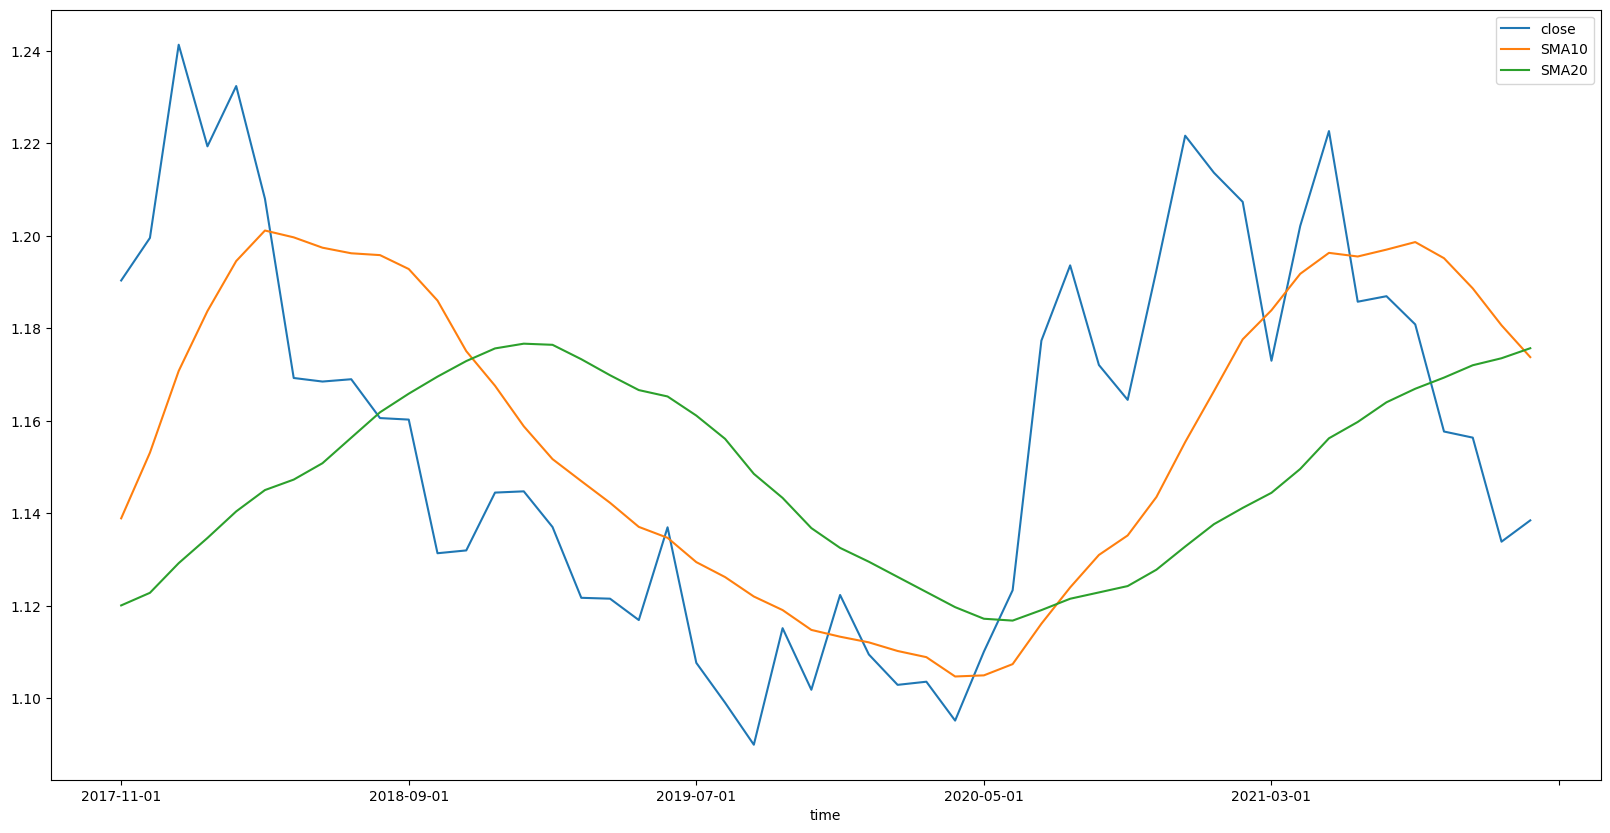

In [497]:
df[['close','SMA10','SMA20','time']].tail(50).plot(figsize=(20,10),x='time')
plt.show()

## Adding Signals to the Dataset

In [498]:
def signal(raw):
    
    if raw['SMA10'] > raw['SMA20']:
        return 1
    elif raw['SMA10']  < raw['SMA20']:
        return 0
    else :
        return np.NaN

df['Signal'] = df.apply(signal,axis=1)

In [499]:
df['Signal'].value_counts()

1.0    51
0.0    50
Name: Signal, dtype: int64

### Filtering the signals - inorder to plot them as points

In [500]:
df['Signal-Filtered'] = df['Signal'][df['Signal'] != df['Signal'].shift()]

### Categorizing the signals as Buy and Sell

In [501]:
df['Signal-Price(BUY)'] = df['close'][df['Signal-Filtered'] == 1]
df['Signal-Price(SELL)'] = df['close'][df['Signal-Filtered'] == 0]

In [502]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL)
70,2017-11-01,1.16460,1.19612,1.15540,1.19036,1547998,1.138911,1.120073,1.0,NaN,NaN,NaN
71,2017-12-01,1.19027,1.20255,1.17176,1.19957,0,1.153111,1.122800,1.0,NaN,NaN,NaN
72,2018-01-01,1.20096,1.25378,1.19156,1.24136,0,1.170785,1.129217,1.0,NaN,NaN,NaN
73,2018-02-01,1.24131,1.25556,1.21879,1.21938,0,1.183744,1.134661,1.0,NaN,NaN,NaN
74,2018-03-01,1.21924,1.24766,1.21546,1.23242,0,1.194561,1.140411,1.0,NaN,NaN,NaN
75,2018-04-01,1.23205,1.24138,1.20554,1.20803,0,1.201169,1.145027,1.0,NaN,NaN,NaN
76,2018-05-01,1.20763,1.20842,1.15101,1.16927,0,1.199692,1.147291,1.0,NaN,NaN,NaN
77,2018-06-01,1.16900,1.18516,1.15081,1.16850,0,1.197456,1.150835,1.0,NaN,NaN,NaN
78,2018-07-01,1.16730,1.17907,1.15750,1.16900,0,1.196246,1.156350,1.0,NaN,NaN,NaN
79,2018-08-01,1.16901,1.17336,1.13010,1.16060,0,1.195849,1.161846,1.0,NaN,NaN,NaN


## Calculating Total Profit for these Signals

In [503]:
df['Profit'] = np.NaN

In [504]:
initial_balance = np.NaN
for index, row in df.iterrows():
    if row['Signal-Filtered'] == 1:  # Buy signal
        if initial_balance is not None:
            profit = initial_balance - row['close']
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']
    elif row['Signal-Filtered'] == 0:  # Sell signal
        if initial_balance is not None:
            profit = row['close'] - initial_balance
            df.at[index, 'Profit'] = profit
        initial_balance = row['close']

In [505]:
df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit
19,2013-08-01,1.33022,1.34518,1.31750,1.32195,0,1.313350,1.300244,1.0,1.0,1.32195,NaN,NaN
34,2014-11-01,1.25085,1.25991,1.23571,1.24498,22224335000,1.328906,1.332742,0.0,0.0,NaN,1.24498,-0.07697
56,2016-09-01,1.11562,1.13266,1.11228,1.12399,2837160733000,1.111983,1.107098,1.0,1.0,1.12399,NaN,0.12099
61,2017-02-01,1.07958,1.08284,1.04933,1.05757,2178835307000,1.092489,1.097892,0.0,0.0,NaN,1.05757,-0.06642
68,2017-09-01,1.19093,1.20924,1.17170,1.18110,3433400,1.116454,1.113580,1.0,1.0,1.18110,NaN,-0.12353
83,2018-12-01,1.13491,1.14859,1.12699,1.14448,0,1.167590,1.175667,0.0,0.0,NaN,1.14448,-0.03662
103,2020-08-01,1.17708,1.19661,1.16960,1.19363,0,1.123965,1.121516,1.0,1.0,1.19363,NaN,-0.04915
119,2021-12-01,1.13348,1.13864,1.12219,1.13847,0,1.173781,1.175706,0.0,0.0,NaN,1.13847,-0.05516


## Categorizing the signals as "Profit" and "Loss"

In [506]:
df['Category'] = None

In [507]:
subset_df = df[(df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] == 0)]

for index in range(len(subset_df)-1):
    current_index = subset_df.index[index]
    next_index = subset_df.index[index + 1]
    
    if subset_df.at[next_index, 'Profit'] < 0:
        df.at[current_index, 'Category'] = 'Loss'
    else:
        df.at[current_index, 'Category'] = 'Profit'

In [508]:
df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0)) & (df['Category'] == 'Profit')]

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
34,2014-11-01,1.25085,1.25991,1.23571,1.24498,22224335000,1.328906,1.332742,0.0,0.0,NaN,1.24498,-0.07697,Profit


In [509]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category
70,2017-11-01,1.16460,1.19612,1.15540,1.19036,1547998,1.138911,1.120073,1.0,NaN,NaN,NaN,NaN,None
71,2017-12-01,1.19027,1.20255,1.17176,1.19957,0,1.153111,1.122800,1.0,NaN,NaN,NaN,NaN,None
72,2018-01-01,1.20096,1.25378,1.19156,1.24136,0,1.170785,1.129217,1.0,NaN,NaN,NaN,NaN,None
73,2018-02-01,1.24131,1.25556,1.21879,1.21938,0,1.183744,1.134661,1.0,NaN,NaN,NaN,NaN,None
74,2018-03-01,1.21924,1.24766,1.21546,1.23242,0,1.194561,1.140411,1.0,NaN,NaN,NaN,NaN,None
75,2018-04-01,1.23205,1.24138,1.20554,1.20803,0,1.201169,1.145027,1.0,NaN,NaN,NaN,NaN,None
76,2018-05-01,1.20763,1.20842,1.15101,1.16927,0,1.199692,1.147291,1.0,NaN,NaN,NaN,NaN,None
77,2018-06-01,1.16900,1.18516,1.15081,1.16850,0,1.197456,1.150835,1.0,NaN,NaN,NaN,NaN,None
78,2018-07-01,1.16730,1.17907,1.15750,1.16900,0,1.196246,1.156350,1.0,NaN,NaN,NaN,NaN,None
79,2018-08-01,1.16901,1.17336,1.13010,1.16060,0,1.195849,1.161846,1.0,NaN,NaN,NaN,NaN,None


In [510]:
df['Filter-by-profit(BUY)'] = df['Signal-Price(BUY)'][df['Category'] == 'Profit']
df['Filter-by-profit(SELL)'] = df['Signal-Price(SELL)'][df['Category'] == 'Profit']

In [511]:
df.tail(50)

,time,open,high,low,close,real_volume,SMA10,SMA20,Signal,Signal-Filtered,Signal-Price(BUY),Signal-Price(SELL),Profit,Category,Filter-by-profit(BUY),Filter-by-profit(SELL)
70,2017-11-01,1.16460,1.19612,1.15540,1.19036,1547998,1.138911,1.120073,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
71,2017-12-01,1.19027,1.20255,1.17176,1.19957,0,1.153111,1.122800,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
72,2018-01-01,1.20096,1.25378,1.19156,1.24136,0,1.170785,1.129217,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
73,2018-02-01,1.24131,1.25556,1.21879,1.21938,0,1.183744,1.134661,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
74,2018-03-01,1.21924,1.24766,1.21546,1.23242,0,1.194561,1.140411,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
75,2018-04-01,1.23205,1.24138,1.20554,1.20803,0,1.201169,1.145027,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
76,2018-05-01,1.20763,1.20842,1.15101,1.16927,0,1.199692,1.147291,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
77,2018-06-01,1.16900,1.18516,1.15081,1.16850,0,1.197456,1.150835,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
78,2018-07-01,1.16730,1.17907,1.15750,1.16900,0,1.196246,1.156350,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN
79,2018-08-01,1.16901,1.17336,1.13010,1.16060,0,1.195849,1.161846,1.0,NaN,NaN,NaN,NaN,None,NaN,NaN


# Exploratory Data Analysis - Part 1 : General Analysis

## Percentage of Signals in whole Dataset

In [512]:
a = len(df[((df['Signal-Filtered'] == 1) | (df['Signal-Filtered'] ==  0))])
b = len(df)
trade_percent = a/b * 100

## Profit Percentage

In [513]:
profit_size = len(df[df['Category']=='Profit'])
total_signal = len(df[df['Signal-Filtered'].isna()==False])
profit_percent = round((profit_size/total_signal)*100,2)
profit_percent

12.5

In [514]:
obs_df = pd.read_csv(r"D:\SY - Class\Forex-market-analysis\Observation.csv")
del obs_df['Unnamed: 0']

In [515]:
input_text = input("Enter Timeframe")
obs_df.loc[len(obs_df.index)+1]=[input_text,profit_percent,trade_percent]

In [516]:
obs_df.to_csv(r"D:\SY - Class\Forex-market-analysis\Observation.csv")

In [517]:
obs_df

,TimeFrame,Profit Percentage,Total trade percentage
0,M10,35.68,5.837966
1,M15,36.46,5.773917
2,M30,36.21,5.618486
3,H1,37.74,5.629577
4,H4,40.49,5.515155
5,H12,35.97,5.359553
6,D1,35.58,6.281310
7,WK,28.57,5.363985
9,MN,12.50,6.666667
